kernel myenv

In [2]:
import numpy as np

<div style="font-family: Arial, sans-serif; font-size: 24px; font-weight: bold;">
    PRIMERA SECCIÓN. INTRODUCCIÓN
</div>

FUNCIONES MATEMÁTICAS
uso de math.nombre()
https://docs.python.org/3/library/math.html

In [4]:
import math as mt
from math import *   #para no tener que usar mt cada que ocupe una funcion
sqrt(4) #no necesito usar print(), solo pongo la variable o la funcion

2.0

NÚMEROS COMPLEJOS
unidad de los imaginarios es 1j,en lugar de i.
Puedes definir un complejo con la notación a + b*1j o con la notación complex(a,b)
-Operaciones:
suma
resta
division
multiplicacion

In [5]:
com1=complex(8,5)
com2=complex(2,6)
comp4=com1+4
print("la suma de un real y un complejo",comp4)
#comandos
r=com1.real
c=com1.imag
cc=com1.conjugate()
c

la suma de un real y un complejo (12+5j)


5.0

FUNCIONES DE VARIABLES COMPLEJAS
en lugar de usar math, se usa cmath para números complejos

In [6]:
from cmath import sin, sinh, exp, cos
r1=sin(8j)
r2=sinh(6j)*e  #puedo seguir usando opciones de math
r3=4j*exp(7j)
r3 #imprime (-2.6279463948751562+3.0156090173732184j), donde -2.6279463948751562 es la parte real y +3.0156090173732184j la imaginaria

(-2.6279463948751562+3.0156090173732184j)

NÚMERO REAL A IMAGINARIO
numero imaginario: 3i
numero complejo(parte real e imaginaria): 2+3i
si tengo un numero real x1=2 y la convierto en imaginaria con 1j

In [7]:
x1=2
x2=2*1j
x2

2j

FUNCIONES EN EL PLANO COMPLEJO
uso de:
from numpy.lib.scimath import *
para funciones con números complejos y reales al mismo tiempo (plano complejo)

In [8]:
from numpy.lib.scimath import *

DERIVADAS E INTEGRALES SIMBÓLICAS

symbols # expresiones simbólicas (representar expresiones algebraicas y matemáticas sin asignarles valores numéricos) 
diff    # derivada de una expresión simbólica con respecto a una variable: diff(expresion, x) seg derivada diff(expresion,x,x)
integrate # integral de una expresión simbólica con respecto de una variable: integrate(expresion, x)
Rational # definir números racionales, es decir, fracciones con numerador y denominador enteros: Rational(1, 3)  # Representa 1/3
lambdify # convertir expresiones simbólicas en funciones que pueden ser evaluadas: f = lambdify(x, expresion), result = f(2)  # Evalúa la expresión en x = 2
solve # encontrará los valores de x (raices con x=0) que satisfacen esta ecuación :solve(equation, x) 

Podemos ver como funciona la diferenciacion e integracion simbolica usando la expresipon v_0t-(1/2)gt^2
Ej. Derivar y luego integrar para regresar a la expresión original de caída libre con respecto al tiempo

In [16]:
from sympy import symbols, diff,integrate, Rational, lambdify,solve
v0,g,t=symbols('v0,g,t')  #en primer lugar todas nuestras variables son símbolos
y=v0*t-Rational(1,2)*g*t**2  #expresión simbólica
print("y=",y)
#derivar
der1=diff(y,t)
print("y'=",der1)
#integrar
int1=integrate(der1,t)
print("la integral de y' es:",int1)
f=lambdify((t,v0,g),y)
print(f(5,10,9.8))
roots = solve(y, t) #resuelve cuando y=0 para t
#print ('Las raices son', roots) 
#print ('La primera raiz es', roots[0])
#print ('La primera raiz es', roots[1])

y= -g*t**2/2 + t*v0
y'= -g*t + v0
la integral de y' es: -g*t**2/2 + t*v0
-72.5


SERIE DE TAYLOR(aproximaciones)

La representación de la expresión expr en Serie de Taylor de orden **n**, en la variable **t** alrededor de **t0**, se calcula como                       
**expr.series(t, t0, n)**.
                        


In [9]:
from sympy import symbols, exp, sin, cos, simplify, expand

#para la funcion e^t 
t = symbols('t')
exp(t).series(t, 0, 3)

#para la funcion e^sen(t)
t = symbols('t')
f = exp(sin(t))
f.series(t, 0, 8)


1 + t + t**2/2 - t**4/8 - t**5/15 - t**6/240 + t**7/90 + O(t**8)


Puedo manipular las epxresiones puedo usar **expand** y **simplify**.   

In [26]:
#funcion -sin(x)*sin(y) + cos(x)*cos(y)
x, y = symbols('x y')
f = -sin(x)*sin(y) + cos(x)*cos(y)

print("normal:",f)
print("simplificada:",simplify(f))
print("expandida:", expand(f))

print("serie de taylor de orden 5, al rededor de 0 en la variable t :",f.series(x,0,5)) #ejemplo de serie de taylor

#ejemplo para otra funcion
x1, y1 = symbols('x1 y1')
expand(sin(x1+y1), trig=True) # con un hint, expande la funcion con propiedades trigonometricas, en este caso usa la propiedad sin(x+y)=sin(x)cos(y),etc




normal: -sin(x)*sin(y) + cos(x)*cos(y)
simplificada: cos(x + y)
expandida: -sin(x)*sin(y) + cos(x)*cos(y)
serie de taylor de orden 5, al rededor de 0 en la variable t : cos(y) - x*sin(y) - x**2*cos(y)/2 + x**3*sin(y)/6 + x**4*cos(y)/24 + O(x**5)


sin(x1)*cos(y1) + sin(y1)*cos(x1)

<div style="font-family: Arial, sans-serif; font-size: 24px; font-weight: bold;">
    SEGUNDA SECCIÓN. ÁLGEBRA LINEAL
</div>


SISTEMA DE ECUACIONES LINEALES. 

Resolvemos x con
$$
\begin{aligned}
    &Ax = b \\
\end{aligned}
$$
tiene solucuón unica si
$$
\begin{aligned}
    &detA ≠ 0 \\
\end{aligned}
$$
Hay varios métodos para solucionar sistema de ecuaciones, la que se usará es la Gauss 

---
CONDICIONES DE SINGULARIDAD DE LA MATRIZ(determinar la singularidas)

-Criterio
$$
\begin{aligned}
    &detA<<||A|| \\
\end{aligned}
$$

la norma es la raíz cuadrada de la suma de los cuadrados de todos los elementos de la matriz.
$$
\| \mathbf{A} \|_e = \sqrt{\sum_{i=1}^{n} \sum_{j=1}^{n} |A_{ij}|^2}
$$




-Número de condición de matriz
indica cuánto puede cambiar la solución si hay pequeños cambios en los coeficientes de la matriz o el vector constante


$$
\begin{aligned}
    &con(A) = ||A||||A^-1|| \\
\end{aligned}
$$

---
SISTEMAS LINEALES
-Método de eliminación de Gauss

tiene dos fases:

+fase de eliminación 

+fase de sustitución
Ej.

$$
\begin{aligned}
    & 4x_1 - 2x_2 + x_3 = 11 \\
    & -2x_1 + 4x_2 - 2x_3 = -16  \\
    & x_1 - 2x_2 + 4x_3 = 17
\end{aligned}
$$
+Eliminar x_1
escogemos primero como pivote (ec1) y multiplicandola por un numero y restarta a (ec2) y (ec3) que haga eliminar a x_1 de estas

multiplicamos (ec1) por -1/2 y restando a (ec2)
$$
\begin{aligned}
    & (-1/2)(4x_1 - 2x_2 + x_3) = 11(-1/2)
\end{aligned}
$$

$$
\begin{aligned}
    & -2x_1 + x_2 - 1/2x_3 = -11/2
\end{aligned}
$$
restarle a (ec2), esta pivote
$$
\begin{aligned}
    & (-2x_1 + 4x_2 - 2x_3 = -16)  \\
    & -(-2x_1 + x_2 - 1/2x_3 = -11/2)
\end{aligned}
$$

queda:
$$
\begin{aligned}
    & 4x_1 - 2x_2 + x_3 = 11 \\
    &        3x_2 - 3/2x_3 = -21/2  \\
    & x_1 - 2x_2 + 4x_3 = 17
\end{aligned}
$$
para la (ec3) multiplicamos nuestra pivote (ec1) por 1/4 y se la restamos a (ec2)

$$
\begin{aligned}
    & 4x_1 - 2x_2 + x_3 = 11 \\
    &        3x_2 - 3/2x_3 = -21/2  \\
    &     - 3/2x_2 + 15/4x_3 = 14.25
\end{aligned}
$$
+Eliminar x_2
ahora escogemos la (ec2) como pivote, la multiplicamos por un numero para eliminar x_2 en (ec2) y (ec3)

al hacer esto obtenemos:
$$
\begin{aligned}
    & 4x_1 - 2x_2 + x_3 = 11 \\
    &      3x_2 - 3/2x_3 = -21/2  \\
    &      3x_3 = 9
\end{aligned}
$$
teniendo esta forma, hacemos sutitución hacia atrás nos queda 
$$
\begin{aligned}
    & x_1=1 , x_2= -2, x_3= 3
\end{aligned}
$$

---
METODO DE GAUSS EN CODIGO

+Fase de Eliminación

Imagina que durante esta fase los primeros \( k \) renglones de \( A \) ya se transformaron a una forma triangular superior.

En este momento, **la ecuación k-ésima es la pivote** y las ecuaciones debajo de ella faltan de transformarse.


Por ejemplo, en la **ecuación i-ésima** queremos eliminar el coeficiente \( A_{ik} \).  
Podemos multiplicar el **renglón pivote** por  

$$
\lambda = \frac{A_{ik}}{A_{kk}}
$$

y restarlo al **renglón i-ésimo**.

Podemos resumir los cambios que haremos en el **i-ésimo** renglón así:

$$
A_{ij} \leftarrow A_{ij} - \lambda A_{kj}, \quad \forall \quad j = k, k+1, \dots, n
$$

$$
b_i \leftarrow b_i - \lambda b_k
$$

Si queremos transformar la matriz completa, escogemos el **renglón pivote** cambiando  
\( k = 1,2,..., n-1 \)  
y escogemos el **renglón a transformar** cambiando  
\( i = k+1, k+2,..., n \).

+Fase de eliminación backward

Después de la eliminación de Gauss, la matriz de coeficientes aumentada tiene la forma:



La última ecuación \( A_{nn} x_n = b_n \) se resuelve primero para tener  

$$
x_n = \frac{b_n}{A_{nn}}
$$

Si seguimos sustituyendo hacia atrás y usamos \( x_n \) para encontrar \( x_{n-1}, x_{n-2}, \dots, x_k \) a partir de la **k-ésima ecuación**,  

$$
A_{kk} x_k + A_{k,k+1} x_{k+1} + \dots + A_{kn} x_n = b_k, \tag{1}
$$

la solución será  

$$
x_k = \left( b_k - \sum_{j=k+1}^{n} A_{kj} x_j \right) \frac{1}{A_{kk}}, \quad k = n-1, n-2, \dots, 1. \tag{2}
$$

<div style="font-family: Arial, sans-serif; font-size: 18px; font-weight: bold;">
    Algoritmo eliminación de Gauss
</div>


In [5]:
a = np.array([[1.0, 0.0, -3.0], [3.0, 1.0, -2.0], [2.0, 2.0, 1.0]])
b = np.array([[-2.0], [5.0], [4.0]])

matriz_aumentada = np.concatenate((a,b), axis=1, dtype=float)
print('La matriz aumentada es :\n', matriz_aumentada)

def gaussElimin(a,b):
  # Fase de eliminacion
  for k in range(0,n-1):
    for i in range(k+1,n):
      if matriz_aumentada[i,k] != 0.0:
        lam = matriz_aumentada[i,k]/matriz_aumentada[k,k]
        matriz_aumentada[i] = matriz_aumentada[i] - lam*matriz_aumentada[k]
        b[i] = b[i] - lam*b[k]
        print(f'El siguiente elemento del procedimiento es: {'\n'}{matriz_aumentada}')
  # Fase de sustitucion hacia atras
  for k in range(n-1,-1,-1):
    b[k] = (b[k] - np.dot(matriz_aumentada[k,k+1:n],b[k+1:n]))/matriz_aumentada[k,k]
  return b


print('El vector solución es :\n',gaussElimin(a,b))

La matriz aumentada es :
 [[ 1.  0. -3. -2.]
 [ 3.  1. -2.  5.]
 [ 2.  2.  1.  4.]]
El siguiente elemento del procedimiento es: 
[[ 1.  0. -3. -2.]
 [ 0.  1.  7. 11.]
 [ 2.  2.  1.  4.]]
El siguiente elemento del procedimiento es: 
[[ 1.  0. -3. -2.]
 [ 0.  1.  7. 11.]
 [ 0.  2.  7.  8.]]
El siguiente elemento del procedimiento es: 
[[  1.   0.  -3.  -2.]
 [  0.   1.   7.  11.]
 [  0.   0.  -7. -14.]]
El vector solución es :
 [[ 4.]
 [-3.]
 [ 2.]]


<div style="font-family: Arial, sans-serif; font-size: 15px; font-weight: bold;">
    ECUACIONES DE CINEMATICA (LINEAL)
</div>

Movimiento con aceleración constante

$$
\begin{aligned}
    &v_f = v_i + at \\  
    &x_f = x_i + v_i t + \frac{1}{2} a t^2 \\  
    &v_f^2 = v_i^2 + 2a(x_f - x_i) \\   
    &x_f - x_i = \frac{(v_i + v_f)}{2} t    
\end{aligned}
$$

<div style="font-family: Arial, sans-serif; font-size: 15px; font-weight: bold;">
    ECUACIONES DE CINEMÁTICA (ANGULAR)
</div>

Movimiento con aceleración angular constante

$$
\begin{aligned}
    &\omega_f = \omega_i + \alpha t \\
    &\theta_f = \theta_i + \omega_i t + \frac{1}{2} \alpha t^2 \\
    &\omega_f^2 = \omega_i^2 + 2\alpha (\theta_f - \theta_i) \\
    &\theta_f - \theta_i = \frac{(\omega_i + \omega_f)}{2} t
\end{aligned}
$$

donde:
- \( \theta_i \) y \( \theta_f \) son la posición angular inicial y final, respectivamente.
- \( \omega_i \) y \( \omega_f \) son la velocidad angular inicial y final, respectivamente.
- \( \alpha \) es la aceleración angular.
- \( t \) es el tiempo.


---
Ejercicio1.
trabajaremos con 

$$
\begin{aligned}
    &\theta_f = \theta_i + \omega_i t + \frac{1}{2} \alpha t^2 \\
\end{aligned}
$$

si tenemos las ecuaciones lineales siguientes

$$
\begin{aligned}
    &9- 2t + 5t^2 = 2 \\
    &9 +4t - 5t^2 = 5 \\
    &2-9t - 3t^2= 0
\end{aligned}
$$

estas ecuaciones representan un movimiento angular de algun cosa, tenemos diferentes valores en thetas y alfa y v, menos en t, que es lo que buscaremos

de forma matricial

\begin{aligned}
&\begin{pmatrix} 
9 & -2 & 5 \\ 
8 & 4 & -5 \\ 
2 & -9 & -3
\end{pmatrix} 
\begin{pmatrix} 
t_1 \\ 
t_2 \\ 
t_3
\end{pmatrix} = 
\begin{pmatrix} 
2 \\ 
5 \\ 
0
\end{pmatrix}
\end{aligned}

queremos conocer el tiempo en el que sucede esto, resolvemos para la matriz ([t1],[t2],[t3])
es :\n',gaussElimin(a,b))

In [6]:
a = np.array([[9.0,-2.0,5.0], [8.0,4.0,-5.0], [2.0,-9.0,-3.0]])
b = np.array([[2.0], [5.0], [0.0]])

matriz_aumentada = np.concatenate((a,b), axis=1, dtype=float)

def gaussElimin(a,b):
  for k in range(0,n-1):
    for i in range(k+1,n):
      if matriz_aumentada[i,k] != 0.0:
        lam = matriz_aumentada[i,k]/matriz_aumentada[k,k]
        matriz_aumentada[i] = matriz_aumentada[i] - lam*matriz_aumentada[k]
        b[i] = b[i] - lam*b[k]
       
  for k in range(n-1,-1,-1):
    b[k] = (b[k] - np.dot(matriz_aumentada[k,k+1:n],b[k+1:n]))/matriz_aumentada[k,k]
  return b


print('El vector solución es :\n',gaussElimin(a,b))

El vector solución es :
 [[ 0.39213603]
 [ 0.16684378]
 [-0.23910733]]


Ejercicio 2.  Un coche se mueve en línea recta y parte del reposo. Se sabe que el coche sigue la ecuación:  

$$
\begin{aligned}
    &x_2 = x_1 + v_1 t + \frac{1}{2} a t^2
\end{aligned}
$$

Datos iniciales:
- \( x_1 = 0 \)
- \( t = 5 \)
- \( x_2 = 50 \)
- \( v_1 = 0 \)

Nuestra ecuación en los primeros 5 segundos sería:

$$
\begin{aligned}
    50 = \frac{1}{2} a (5)^2
\end{aligned}
$$

Datos en los siguientes 3 segundos:
- \( x_1 = 50 \)
- \( t = 3 \)
- \( a = 0 \)

Nuestra ecuación para la velocidad final es:

$$
\begin{aligned}
    v_2 = a(5)
\end{aligned}
$$

Última ecuación:

$$
\begin{aligned}
    x_f = v_2 (2) - \frac{1}{2} \left( -\frac{v_f}{2} \right) (2)^2
\end{aligned}
$$

Reorganizando:

$$
\begin{aligned}
    x_f = 3 v_2
\end{aligned}
$$

Sistema de ecuaciones lineales:

$$
\begin{aligned}
    &25a = 100 \\
    &v_f - 5a = 0 \\
    &x_2 - 3v_2 = 0
\end{aligned}
$$

De forma matricial:

$$
\begin{aligned}
    &\begin{pmatrix} 
    0 & 0 & 25 \\ 
    0 & 1 & -5 \\ 
    1 & -3 & 0
    \end{pmatrix} 
    \begin{pmatrix} 
    x_2 \\ 
    v_2 \\ 
    a
    \end{pmatrix} = 
    \begin{pmatrix} 
    0 \\ 
    0 \\ 
    100
    \end{pmatrix}
\end{aligned}
$$



In [7]:
a = np.array([[0.0,0.0,25.0], [0.0,1.0,-5.0], [1.0,-3.0,0.0]])

b = np.array([[0.0], [0.0], [100.0]])

matriz_aumentada = np.concatenate((a,b), axis=1, dtype=float)

def gaussElimin(a,b):
  
  for k in range(0,n-1):
    for i in range(k+1,n):
      if matriz_aumentada[i,k] != 0.0:
        lam = matriz_aumentada[i,k]/matriz_aumentada[k,k]
        matriz_aumentada[i] = matriz_aumentada[i] - lam*matriz_aumentada[k]
        b[i] = b[i] - lam*b[k]

  for k in range(n-1,-1,-1):
    b[k] = (b[k] - np.dot(matriz_aumentada[k,k+1:n],b[k+1:n]))/matriz_aumentada[k,k]
  return b

print('El vector solución es :\n',gaussElimin(a,b))

El vector solución es :
 [[nan]
 [nan]
 [nan]]


/tmp/ipykernel_3540/1680863420.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  lam = matriz_aumentada[i,k]/matriz_aumentada[k,k]
/tmp/ipykernel_3540/1680863420.py:13: RuntimeWarning: invalid value encountered in multiply
  matriz_aumentada[i] = matriz_aumentada[i] - lam*matriz_aumentada[k]
/tmp/ipykernel_3540/1680863420.py:14: RuntimeWarning: invalid value encountered in multiply
  b[i] = b[i] - lam*b[k]


<div style="font-family: Arial, sans-serif; font-size: 24px; font-weight: bold;">
    TERCERA SECCIÓN. AJUSTE E INTERPOLACIÓN
</div>

INTERPOLACIÓN Y AJUSTE DE CURVAS

dados n+1 datos (xi,yi) con i=0,1,...,n, estima y(x), cuando tenemos que analizar datos de observaciones experimentales etc.

**Interpolación:** construir una curva que pase por los datos. Entonces estamos asumiendo que los datos son precisos.

**Ajuste a una curva:** construir una curva que aproxime los datos. Entonces estamos asumiendo que los datos tienen ruido (por ejemplo el debido a los errores en la medición). La curva no necesariamente pasa por los datos.


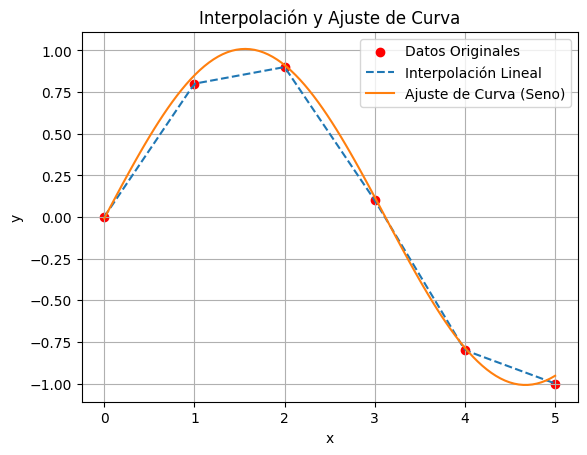

In [9]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

# Datos de ejemplo
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 0.8, 0.9, 0.1, -0.8, -1])

# INTERPOLACIÓN LINEAL
interpolacion_lineal = interp1d(x, y, kind="linear")
x_interpolado = np.linspace(0, 5, 100)
y_interpolado_lineal = interpolacion_lineal(x_interpolado)#calcula los valores interpolados de mi array en x


# AJUSTE A UNA CURVA(se usa función sinusoidal por este ejemplo de datos periódicos)

def func_seno(x, a, b, c):
    return a * np.sin(b * x + c)


parametros, _ = curve_fit(func_seno, x, y) #ajusta mi función a los datos x y y
y_ajustado = func_seno(x_interpolado, *parametros) #calcula los valores dela funcion ajustada en los puntos interpolados

# Graficar los datos originales
plt.scatter(x, y, label="Datos Originales", color="red")

# Graficar la interpolación lineal
plt.plot(
    x_interpolado, y_interpolado_lineal, label="Interpolación Lineal", linestyle="--"
)

# Graficar el ajuste de curva
plt.plot(x_interpolado, y_ajustado, label="Ajuste de Curva (Seno)", linestyle="-")


plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación y Ajuste de Curva")
plt.legend()
plt.grid(True)
plt.show()

---
MÉTODO DE LAGRANGE

Se busca un polinomio que pase por cada uno de los puntos de la función, a partir de las diferencias divididas

Se propone un polinomio de la forma:

$$
P_n(x) = \sum_{i=0}^{n} A_i (x - x_1)(x - x_2) \cdots (x - x_{n-1})
$$

que es un polinomio de grado \( n-1 \) y los coeficientes \( A_i \) deben determinarse de tal manera que el polinomio pase por todos y cada uno de los puntos de la función tabular.

Evaluando en \( x = x_0 \) y despejando \( A_0 \):

$$
A_0 = \frac{P_0}{(x_0 - x_1)(x_0 - x_2) \cdots (x_0 - x_{n-1})}
$$

así hasta el punto \( x = x_n \):

$$
A_n = \frac{P_n}{(x_n - x_1)(x_n - x_2) \cdots (x_n - x_{n-1})}
$$

y entonces el polinomio \( P_n(x) \) es:

$$
P_n(x) = \frac{P_0 (x - x_2) \cdots (x - x_{n-1})}{(x_0 - x_1)(x_0 - x_2) \cdots (x_0 - x_{n-1})} + \cdots + \frac{P_n (x - x_2) \cdots (x - x_{n-1})}{(x_n - x_1)(x_n - x_2) \cdots (x_n - x_{n-1})}
$$

---
que es la expresión de **Lagrange**:

$$
P_n(x) = \sum_{i=0}^{n} y_i \ell_i(x) = \sum_{i=0}^{n} y_i \prod_{j(\neq i)=0}^{n} \frac{x - x_j}{x_i - x_j}, \quad i = 0, 1, \dots, n.
$$

---
donde li(x)  son **funciones cardinales**.

Si ( n = 1 ), el polinomio de interpolación es una recta:

$$
P_1(x) = y_0 \ell_0(x) + y_1 \ell_1(x)
$$

donde las funciones de base de Lagrange son:

$$
\ell_0(x) = \frac{x - x_1}{x_0 - x_1},
$$

$$
\ell_1(x) = \frac{x - x_0}{x_1 - x_0}.
$$


Si ( n = 2 ), el polinomio de interpolación es una parábola:

$$
P_2(x) = y_0 \ell_0(x) + y_1 \ell_1(x) + y_2 \ell_2(x)
$$

donde las funciones de base de Lagrange son:

$$
\ell_0(x) = \frac{(x - x_1)(x - x_2)}{(x_0 - x_1)(x_0 - x_2)},
$$

$$
\ell_1(x) = \frac{(x - x_0)(x - x_2)}{(x_1 - x_0)(x_1 - x_2)},
$$

$$
\ell_2(x) = \frac{(x - x_0)(x - x_1)}{(x_2 - x_0)(x_2 - x_1)}.
$$

---

Las funciones cardinales tienen la propiedad:

$$
\ell_i(x_j) =
\begin{cases} 
0 & \text{si } i \neq j, \\
1 & \text{si } i = j.
\end{cases}
$$

Es decir:

$$
\ell_i(x_j) = \delta_{ij}.
$$


---

El error en la interpolación con polinomios se puede expresar como:

$$
f(x) - P_n(x) = \frac{(x - x_0)(x - x_1) \cdots (x - x_n)}{(n+1)!} f^{(n+1)}(\xi),
$$

donde (E pertenece a (x_0,x_n)).  

Esto indica que **cuanto más lejos esté \( x \) de los puntos dados, mayor será el error**.



---
EJEMPLO 1: Método de Lagrange

El método de Lagrange también puede ser utilizada para datos que no están igualmente espaciados.

Los polinomios básicos de Lagrange l_i(x) se definen como:

$$
\ell_i(x) = \prod_{\substack{0 \leq j \leq n \\ j \neq i}} \frac{x - x_j}{x_i - x_j}
$$

Dado \( x = [0, 20, 40, 60] \), calculamos las funciones base:

$$
\ell_0(x) = \frac{(x - 20)(x - 40)(x - 60)}{(0 - 20)(0 - 40)(0 - 60)}
$$

$$
\ell_1(x) = \frac{(x - 0)(x - 40)(x - 60)}{(20 - 0)(20 - 40)(20 - 60)}
$$

$$
\ell_2(x) = \frac{(x - 0)(x - 20)(x - 60)}{(40 - 0)(40 - 20)(40 - 60)}
$$

$$
\ell_3(x) = \frac{(x - 0)(x - 20)(x - 40)}{(60 - 0)(60 - 20)(60 - 40)}
$$

Cálculo de l_i(10):

$$
\ell_0(10) = \frac{(-10)(-30)(-50)}{(-20)(-40)(-60)} = -\frac{5}{16}
$$

$$
\ell_1(10) = \frac{(10)(-30)(-50)}{(20)(-20)(-40)} = \frac{15}{16}
$$

$$
\ell_2(10) = \frac{(10)(-10)(-50)}{(40)(20)(-20)} = -\frac{5}{16}
$$

$$
\ell_3(10) = \frac{(10)(-10)(-30)}{(60)(40)(20)} = \frac{1}{16}
$$

Cálculo del valor interpolado y_p:

$$
y_p = \sum_{i=0}^{3} y_i \ell_i(10)
$$

Sustituyendo los valores:

$$
y_p = 26.0 \times \left(-\frac{5}{16}\right) + 48.6 \times \frac{15}{16} + 71.2 \times \left(-\frac{5}{16}\right) + 71.2 \times \frac{1}{16}
$$

$$
y_p = 26.0 \times \left(-\frac{5}{16}\right) + 48.6 \times \left(\frac{15}{16}\right) + 71.2 \times \left(-\frac{5}{16}\right) + 71.2 \times \left(\frac{1}{16}\right)
$$

$$
y_p = -8.125 + 45.5625 - 22.25 + 4.45
$$

$$
y_p = 38.9
$$

El valor interpolado en \( x = 10 \) es **\( y_p = 38.9 \)**.

<div style="font-family: Arial, sans-serif; font-size: 18px; font-weight: bold;">
    Algoritmo del método de Lagrange
</div>



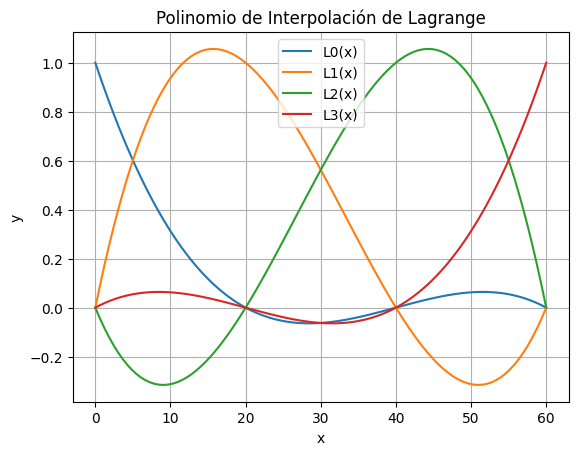

In [10]:
# Definir los puntos
x = [0, 20, 40, 60]
y = [26.0, 48.6, 61.6, 71.2]
m = len(x)
n = m - 1

# Función para calcular los polinomios básicos de Lagrange
def lagrange_basis(xp, x_points, i):
    L_i = 1
    for j in range(len(x_points)):
        if j != i:
            L_i *= (xp - x_points[j]) / (x_points[i] - x_points[j])
    return L_i


# Crear puntos para la interpolación
x_interpolado = np.linspace(min(x), max(x), 100)

# Graficar los polinomios básicos de Lagrange
for i in range(n + 1):
    L_values = [lagrange_basis(x_val, x, i) for x_val in x_interpolado]
    plt.plot(x_interpolado, L_values, label=f"L{i}(x)")
# Añadir etiquetas y leyenda
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polinomio de Interpolación de Lagrange")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

EJEMPLO 2.

usando el método de interpolación de Lagrange

1. código visto en clase

2. función scipy

encuentre el valor de relación de expansión correspondiente a un peso de 5.5 libras dentro de una lista de valores de tensiones de prueba:
| Peso(lb) | Expansión |
|-----------|-----------|
| 2.4 | 0.101 |
| 5.1| 0.128 |
| 7.0 | 0.241 |
| 8.5 | 0.403 |
| 9.7 | 0.677 |



tenemos diferentes puntos para encontrar nuestro polinomio de Lagrange y queremos conocer un y para cuando x=5.5. Entonces primero encontramos nuestro polinomio y luego lo evaluamos en x=5.5

**usaremos tres codigos**

Enter x:  2


For x = 2.0, y = 0.7


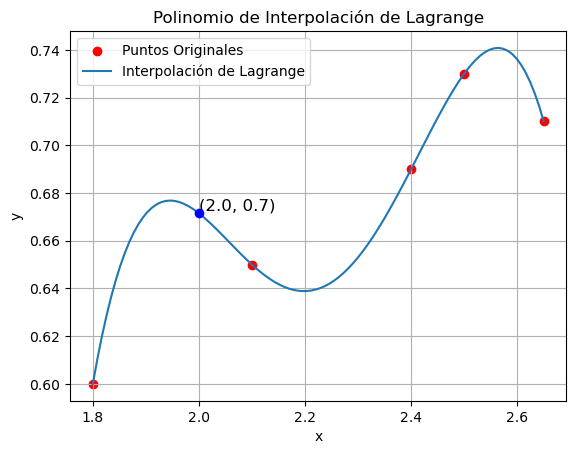

Polinomio de Interpolación de Lagrange:
y(x) = (1.87058823529412 - 0.705882352941177*x)*(3.57142857142857 - 1.42857142857143*x)*(4.0 - 1.66666666666667*x)*(7.0 - 3.33333333333333*x) + (3.13181818181818 - 1.18181818181818*x)*(6.25 - 2.5*x)*(8.0 - 3.33333333333334*x)*(3.33333333333333*x - 6.0) + (7.314 - 2.76*x)*(25.0 - 9.99999999999999*x)*(1.66666666666667*x - 3.0)*(3.33333333333334*x - 7.0) + (12.8966666666667 - 4.86666666666667*x)*(1.42857142857143*x - 2.57142857142857)*(2.5*x - 5.25)*(9.99999999999999*x - 24.0) + (1.17647058823529*x - 2.11764705882353)*(1.81818181818182*x - 3.81818181818182)*(4.0*x - 9.6)*(4.73333333333334*x - 11.8333333333333)

Polinomio Simplificado:
y(x) = -7.20312367371193*x**4 + 64.4192343604109*x**3 - 214.653798489094*x**2 + 315.909826839826*x - 172.636844919786


In [16]:
import matplotlib.pyplot as plt
import sympy as sp


def lagrange_1(x_points, y_points, xp):
    """
    Calcula y grafica el polinomio de interpolación de Lagrange.

    Parámetros:
    x_points (list or array): Puntos en el eje x.
    y_points (list or array): Puntos en el eje y.
    xp (float): Punto en el que se desea interpolar.

    Retorna:
    yp (float): Valor interpolado en xp.
    """
    m = len(x_points)
    n = m - 1
    # Definir la variable simbólica
    x = sp.symbols("x")

    # Función para calcular los polinomios básicos de Lagrange
    def lagrange_basis(xp, x_points, i):
        L_i = 1
        for j in range(len(x_points)):
            if j != i:
                L_i *= (xp - x_points[j]) / (x_points[i] - x_points[j])
        return L_i

    # Función para calcular el polinomio de Lagrange
    def lagrange_interpolation(xp, x_points, y_points):
        yp = 0
        for i in range(len(x_points)):
            yp += y_points[i] * lagrange_basis(xp, x_points, i)
        return yp

    # Calcular el valor interpolado
    yp = lagrange_interpolation(xp, x_points, y_points)
    print("For x = %.1f, y = %.1f" % (xp, yp))

    # Crear puntos para la interpolación
    x_interpolado = np.linspace(min(x_points), max(x_points), 100)
    y_interpolado = [
        lagrange_interpolation(x_val, x_points, y_points) for x_val in x_interpolado
    ]

    # Graficar los puntos originales
    plt.scatter(x_points, y_points, label="Puntos Originales", color="red")

    # Graficar el polinomio de interpolación de Lagrange
    plt.plot(
        x_interpolado, y_interpolado, label="Interpolación de Lagrange", linestyle="-"
    )

    # Graficar el valor interpolado
    plt.scatter(xp, yp, color="blue", zorder=5)
    plt.text(xp, yp, f"({xp:.1f}, {yp:.1f})", fontsize=12, verticalalignment="bottom")

    # Añadir etiquetas y leyenda
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Polinomio de Interpolación de Lagrange")
    plt.legend()
    plt.grid(True)

    # Mostrar la gráfica
    plt.show()

    # Construir el polinomio de interpolación simbólicamente
    polinomio = 0
    for i in range(len(x_points)):
        term = y_points[i]
        for j in range(len(x_points)):
            if j != i:
                term *= (x - x_points[j]) / (x_points[i] - x_points[j])
        polinomio += term

    # Simplificar el polinomio
    polinomio_simplificado = sp.simplify(polinomio)

    # Imprimir el polinomio de interpolación
    print("Polinomio de Interpolación de Lagrange:")
    print(f"y(x) = {polinomio}")
    print("\nPolinomio Simplificado:")
    print(f"y(x) = {polinomio_simplificado}")

    return yp


        4        3         2
-2.441 x + 21.8 x - 72.58 x + 106.9 x - 58.16
Para x= 10 y= -8859.44080213933


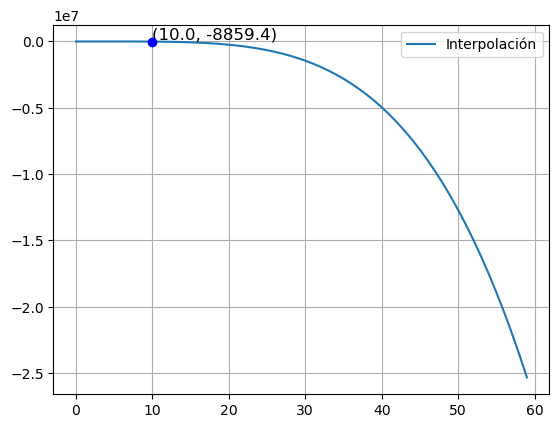

In [22]:
# Método de Lagrange con scipy
from scipy.interpolate import lagrange
x_points = [2.65, 2.5, 2.4,2.1, 1.8]
y_points = [0.71, 0.71, 0.69, 0.65, 0.6]
L = lagrange(x_points, y_points)


x1 = np.arange(0, 60, 1)
xp = 10
yp = L(xp)
print(L)
print("Para x=", xp, "y=", yp)
# graficar valor interpolado

plt.plot(x1, L(x1), label="Interpolación")
#plt.plot(x, y, "o", label="Datos")
# Graficar el valor interpolado
plt.scatter(xp, yp, color="blue", zorder=5)
plt.text(xp, yp, f"({xp:.1f}, {yp:.1f})", fontsize=12, verticalalignment="bottom")


plt.legend()
plt.grid()
plt.show()

In [11]:
import math
g=9.81
x=float(input("inserte la altura"))
t=math.sqrt((2*x)/g)
t

inserte la altura 2.5


0.7139215614635323

Enter x:  2.3


For x = 2.3, y = 0.7


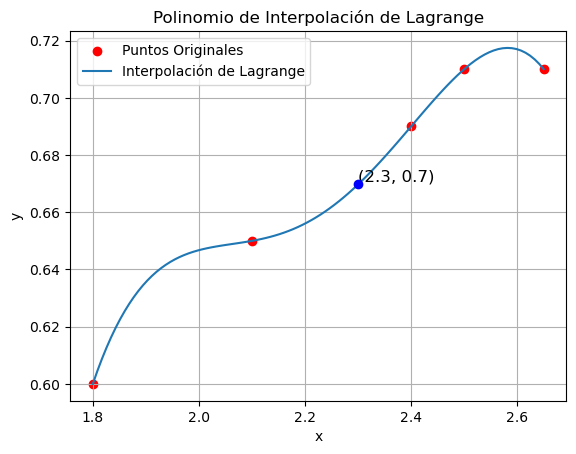

Polinomio de Interpolación de Lagrange:
y(x) = (1.87058823529412 - 0.705882352941177*x)*(3.57142857142857 - 1.42857142857143*x)*(4.0 - 1.66666666666667*x)*(7.0 - 3.33333333333333*x) + (3.13181818181818 - 1.18181818181818*x)*(6.25 - 2.5*x)*(8.0 - 3.33333333333334*x)*(3.33333333333333*x - 6.0) + (7.314 - 2.76*x)*(25.0 - 9.99999999999999*x)*(1.66666666666667*x - 3.0)*(3.33333333333334*x - 7.0) + (12.5433333333333 - 4.73333333333334*x)*(1.42857142857143*x - 2.57142857142857)*(2.5*x - 5.25)*(9.99999999999999*x - 24.0) + (1.17647058823529*x - 2.11764705882353)*(1.81818181818182*x - 3.81818181818182)*(4.0*x - 9.6)*(4.73333333333334*x - 11.8333333333333)

Polinomio Simplificado:
y(x) = -2.4412189118072*x**4 + 21.8001867413636*x**3 - 72.5823699176653*x**2 + 106.895541125539*x - 58.1568449197853


In [20]:

try:
    x_points = [2.65, 2.5, 2.4,2.1, 1.8]
    y_points = [0.71, 0.71, 0.69, 0.65, 0.6]
    xp = float(input("Enter x: "))
    lagrange_1(x_points, y_points, xp)
except ValueError:
    print("Please insert a valid number")

In [28]:
def lagrange_interpolation(xp, x_points, y_points):
    yp = 0
    for i in range(len(x_points)):
        yp += y_points[i] * lagrange_basis(xp, x_points, i)
    return yp
# Solicitar el valor de x para interpolar
xp = float(input("Enter x: "))
yp = lagrange_interpolation(xp, x, y)
print("For x = %.1f, y = %.1f" % (xp, yp))
For x = 10.0, y = 38.9
# Crear puntos para la interpolación
x_interpolado = np.linspace(min(x), max(x), 100)
y_interpolado = [lagrange_interpolation(x_val, x, y) for x_val in x_interpolado]
# Graficar los puntos originales
plt.scatter(x, y, label="Puntos Originales", color="red")
# Graficar el polinomio de interpolación de Lagrange
plt.plot(x_interpolado, y_interpolado, label="Interpolación de Lagrange", linestyle="-")
# Graficar los puntos de interpolación
plt.scatter(xp, yp, label=f"Punto Interpolado (x={xp}, y={yp})", color="blue", zorder=5)


# Añadir etiquetas y leyenda
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polinomio de Interpolación de Lagrange")
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

SyntaxError: invalid syntax (1520475375.py, line 10)